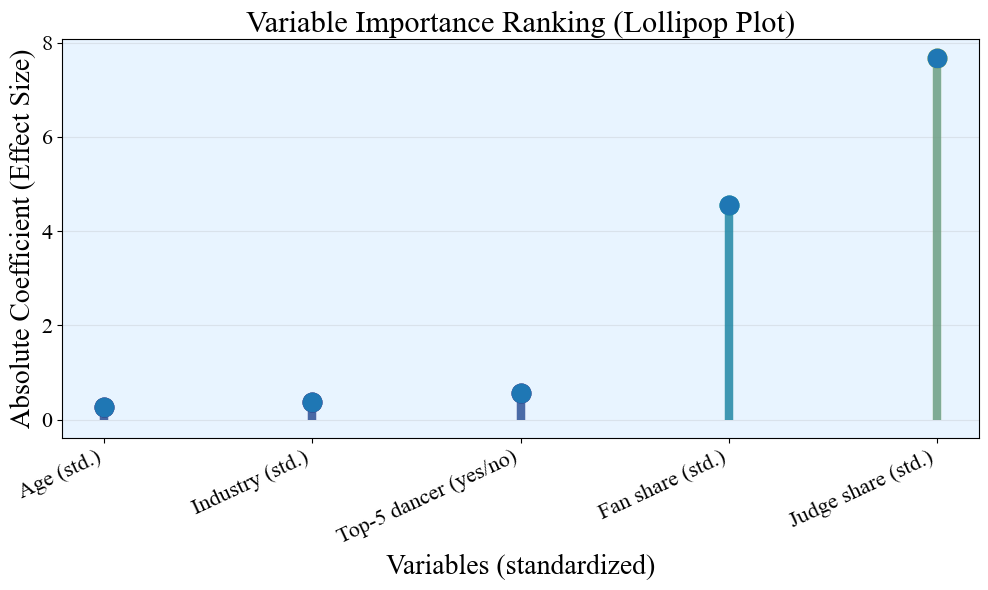

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "font.family": "Times New Roman",
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.unicode_minus": False
})

df = pd.read_csv("q3_variable_importance.csv")
df["abs_beta"] = pd.to_numeric(df["abs_beta"], errors="coerce")
df = df.sort_values("abs_beta", ascending=True).dropna(subset=["abs_beta"])

name_map = {
    "评委占比（标准化）": "Judge share (std.)",
    "粉丝占比（标准化）": "Fan share (std.)",
    "是否Top5舞者": "Top-5 dancer (yes/no)",
    "行业（标准化）": "Industry (std.)",
    "年龄（标准化）": "Age (std.)",
}
df["feature_en"] = df["feature"].map(name_map).fillna(df["feature"])


name_map = {
    "评委占比（标准化）": "Judge share (std.)",
    "粉丝占比（标准化）": "Fan share (std.)",
    "是否Top5舞者": "Top-5 dancer (yes/no)",
    "行业（标准化）": "Industry (std.)",
    "年龄（标准化）": "Age (std.)",
}

df["feature_en"] = df["feature"].map(name_map).fillna(df["feature"])
x_labels = df["feature_en"].astype(str).tolist()


x_labels = df["feature_en"].tolist()
y_vals = df["abs_beta"].to_numpy()
x_pos = range(len(x_labels))






cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(y_vals), vmax=max(y_vals))
colors = [cmap(norm(v)) for v in y_vals]



fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor("#E8F4FF")
fig.patch.set_facecolor("white")



for xi, yi, c in zip(x_pos, y_vals, colors):
    ax.vlines(xi, 0, yi, linewidth=6, alpha=0.65, color=c)
    ax.scatter(xi, yi, s=180, zorder=3, color=c)


ax.vlines(x=x_pos, ymin=0, ymax=y_vals, linewidth=6, alpha=0.55)
ax.scatter(x_pos, y_vals, s=180, zorder=3)

ax.set_title("Variable Importance Ranking (Lollipop Plot)")
ax.set_xlabel("Variables (standardized)")
ax.set_ylabel("Absolute Coefficient (Effect Size)")

ax.set_xticks(list(x_pos))
ax.set_xticklabels(x_labels, rotation=25, ha="right")

ax.grid(True, axis="y", alpha=0.25)
plt.tight_layout()
plt.show()
